<a href="https://colab.research.google.com/github/Iddhie/github-slideshow/blob/main/Job_Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Kaggle dataset for KNN Classification to predict Job placement status
------------------------------------------------------------------- 

In [33]:
#from google.colab import drive
#drive.mount('/content/gdrive')
filename = "/content/gdrive/MyDrive/Colab Notebooks/Job_Placement_Data.csv"
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv(filename)
df.head

<bound method NDFrame.head of     gender  ssc_percentage ssc_board  hsc_percentage hsc_board hsc_subject  \
0        M           67.00    Others           91.00    Others    Commerce   
1        M           79.33   Central           78.33    Others     Science   
2        M           65.00   Central           68.00   Central        Arts   
3        M           56.00   Central           52.00   Central     Science   
4        M           85.80   Central           73.60   Central    Commerce   
..     ...             ...       ...             ...       ...         ...   
210      M           80.60    Others           82.00    Others    Commerce   
211      M           58.00    Others           60.00    Others     Science   
212      M           67.00    Others           67.00    Others    Commerce   
213      F           74.00    Others           66.00    Others    Commerce   
214      M           62.00   Central           58.00    Others     Science   

     degree_percentage undergrad_

In [34]:
# Remove unnessary columns
df_processed = df.drop(["ssc_board","hsc_board"], axis=1)
df_processed.head(5)

,gender,ssc_percentage,hsc_percentage,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [7]:
# Check for missing data
df_processed.isnull().sum(axis=0)

gender                 0
ssc_percentage         0
hsc_percentage         0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [8]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   hsc_percentage       215 non-null    float64
 3   hsc_subject          215 non-null    object 
 4   degree_percentage    215 non-null    float64
 5   undergrad_degree     215 non-null    object 
 6   work_experience      215 non-null    object 
 7   emp_test_percentage  215 non-null    float64
 8   specialisation       215 non-null    object 
 9   mba_percent          215 non-null    float64
 10  status               215 non-null    object 
dtypes: float64(5), object(6)
memory usage: 18.6+ KB


<Figure size 432x288 with 0 Axes>

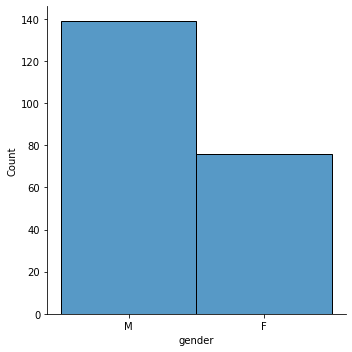

<Figure size 432x288 with 0 Axes>

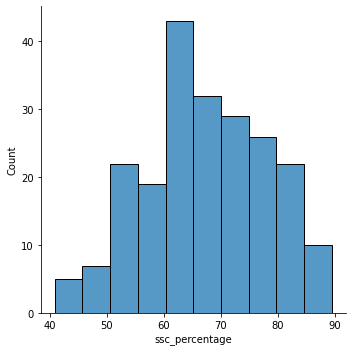

<Figure size 432x288 with 0 Axes>

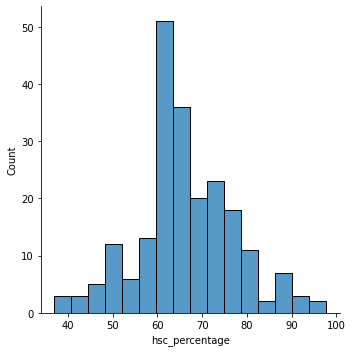

<Figure size 432x288 with 0 Axes>

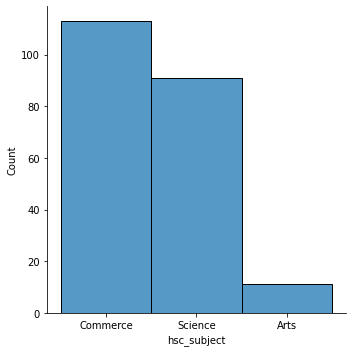

<Figure size 432x288 with 0 Axes>

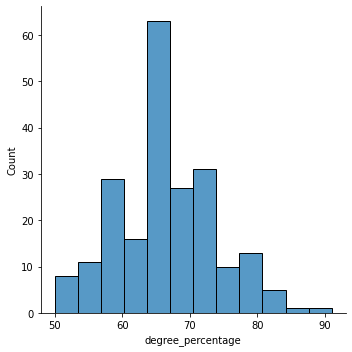

<Figure size 432x288 with 0 Axes>

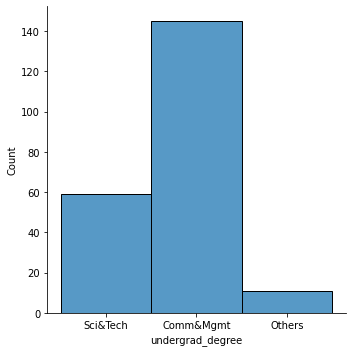

<Figure size 432x288 with 0 Axes>

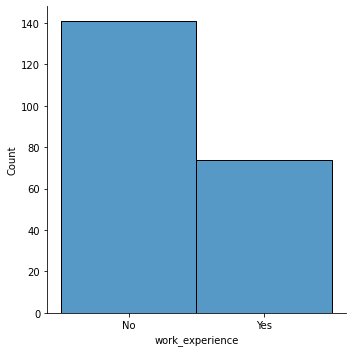

<Figure size 432x288 with 0 Axes>

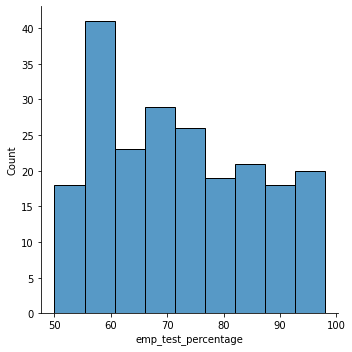

<Figure size 432x288 with 0 Axes>

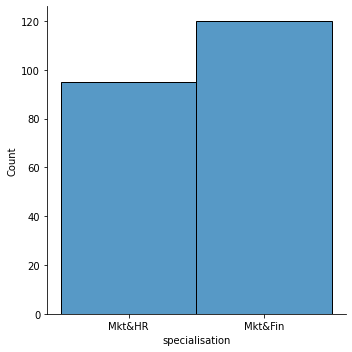

<Figure size 432x288 with 0 Axes>

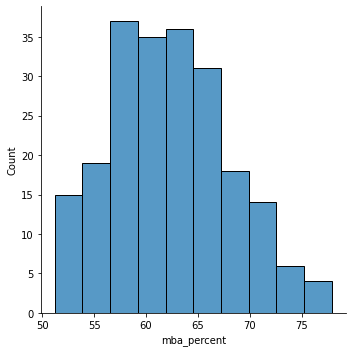

<Figure size 432x288 with 0 Axes>

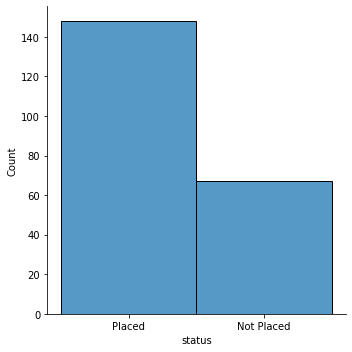

In [9]:
# Visualise distribution of dataframe data
for column in df_processed.columns:
    plt.figure()
    sns.displot(df_processed, x=column)
    plt.show()

In [13]:
# One-hot encode the categorical features
df_encoded = pd.get_dummies(df_processed, columns=['gender','hsc_subject', 'undergrad_degree', 'work_experience','specialisation','status'])
df_encoded.columns

Index(['ssc_percentage', 'hsc_percentage', 'degree_percentage',
       'emp_test_percentage', 'mba_percent', 'gender_F', 'gender_M',
       'hsc_subject_Arts', 'hsc_subject_Commerce', 'hsc_subject_Science',
       'undergrad_degree_Comm&Mgmt', 'undergrad_degree_Others',
       'undergrad_degree_Sci&Tech', 'work_experience_No',
       'work_experience_Yes', 'specialisation_Mkt&Fin',
       'specialisation_Mkt&HR', 'status_Not Placed', 'status_Placed'],
      dtype='object')

In [14]:
# check for summary of features
df_encoded.describe()
     

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_F,gender_M,hsc_subject_Arts,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Comm&Mgmt,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_No,work_experience_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,0.353488,0.646512,0.051163,0.525581,0.423256,0.674419,0.051163,0.274419,0.655814,0.344186,0.558140,0.441860,0.311628,0.688372
std,10.827205,10.897509,7.358743,13.275956,5.833385,0.479168,0.479168,0.220844,0.500510,0.495228,0.469685,0.220844,0.447262,0.476211,0.476211,0.497767,0.497767,0.464240,0.464240
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


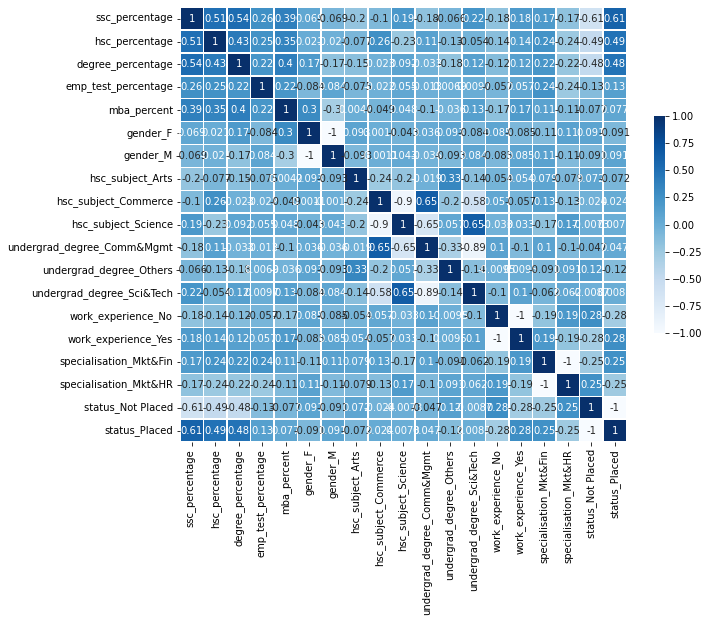

In [15]:
# Set the figure size
corr = df_encoded.corr()
plt.figure(figsize=(10, 8))
# Create the heatmap with higher resolution
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2g', linewidths=0.5, cbar_kws={'shrink': 0.5})

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [16]:
X = df_encoded.drop('status_Placed', axis=1)
y = df_encoded['status_Placed']

In [39]:
#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [40]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Train the model using the training set
knn.fit(X_train, y_train)

# Evaluate the model on the validation set
val_accuracy = knn.score(X_val, y_val)

# Predict y values for the validation set
y_pred = knn.predict(X_val)

# Calculate model fit paratmeters for the validation set
print("Validation Accuracy of Model 1: {:.2f}%".format(accuracy_score(y_val, y_pred) * 100))
print("Validation Precision of Model 1: {:.2f}%:".format(precision_score(y_val, y_pred) * 100))
print("Validation Recall of Model 1: {:.2f}%".format(recall_score(y_val, y_pred) * 100))
print("Validation F1-score of Model 1: {:.2f}%".format(f1_score(y_val, y_pred) * 100))    


Validation Accuracy of Model 1: 88.37%
Validation Precision of Model 1: 86.49%:
Validation Recall of Model 1: 100.00%
Validation F1-score of Model 1: 92.75%


In [23]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


In [41]:

# Scale the data
scaler = StandardScaler()
X2_train = scaler.fit_transform(X_train)
X2_test = scaler.transform(X_test)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn.fit(X2_train, y_train)

# Make predictions on the testing set and calculate accuracy
y_pred = knn.predict(X2_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Model 2:", accuracy*100,"%")

Accuracy of Model 2: 90.69767441860465 %


In [42]:
y2_pred = grid_search.predict(X2_test)
y2_test = y_test
print("Test Accuracy with the best hyperparameters: {:.2f}%".format(accuracy_score(y2_test, y2_pred) * 100))
print("Test Precision with the best hyperparameters: {:.2f}%:".format(precision_score(y2_test, y2_pred) * 100))
print("Test Recall with the best hyperparameters: {:.2f}%".format(recall_score(y2_test, y2_pred) * 100))
print("Test F1-score with the best hyperparameters: {:.2f}%".format(f1_score(y2_test, y2_pred) * 100))

cm = confusion_matrix(y2_test, y2_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print("Test specificity with the best hyperparameters: {:.2f}%".format(specificity * 100))
print("Test specificity with the best hyperparameters: {:.2f}%".format(specificity * 100))

Test Accuracy with the best hyperparameters: 90.70%
Test Precision with the best hyperparameters: 87.10%:
Test Recall with the best hyperparameters: 100.00%
Test F1-score with the best hyperparameters: 93.10%
Test specificity with the best hyperparameters: 75.00%
Test specificity with the best hyperparameters: 75.00%


Job Placement Prediction



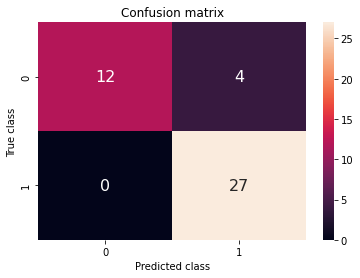

In [36]:
print("Job Placement Prediction\n")
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()